<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorio N°03

## Objetivos del laboratorio

* Reforzar conceptos básicos de análisis no supervisado.

### Fabián Rubilar 
### 201510509-K

## Contenidos

* [Problema 01](#p1)


<a id='p1'></a>
## I.- Problema 01


<img src="https://freedesignfile.com/upload/2013/06/Car-logos-1.jpg" width="360" height="360" align="center"/>


El conjunto de datos se denomina `vehiculos_procesado_con_grupos.csv`, el cual contine algunas de las características más importante de un vehículo.

En este ejercicio se tiene como objetivo, es poder clasificar los distintos vehículos basados en las cracterísticas que se presentan a continuación. La dificultad de este ejercicio radíca en que ahora tenemos variables numéricas y variables categóricas.

Lo primero será cargar el conjunto de datos:

In [51]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans


%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [52]:
# cargar datos
df = pd.read_csv(os.path.join("data","vehiculos_procesado_con_grupos.csv"), sep=",")\
       .drop(
            ["fabricante", 
             "modelo",
             "transmision", 
             "traccion", 
             "clase", 
             "combustible",
             "consumo"], 
    
          axis=1)

df.head()

,year,desplazamiento,cilindros,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla
0,1984,2.5,4.0,522.764706,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.222671
1,1984,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
2,1985,2.5,4.0,555.437500,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.236588
3,1985,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
4,1987,3.8,6.0,555.437500,Coches Medianos,dos,Automatica,Premium,grande,alto,alto,0.236588


En este caso, no solo se tienen datos numéricos, sino que también categóricos. Además, tenemos problemas de datos **vacíos (Nan)**. Así que para resolver este problema, seguiremos varios pasos:

## 1.- Normalizar datos

1. Cree un conjunto de datos con las variables numéricas, además, para cada dato vacía, rellene con el promedio asociado a esa columna. Finalmente, normalize los datos mediante el procesamiento **MinMaxScaler** de **sklearn**.

2.-  Cree un conjunto de datos con las variables categóricas , además, transforme de variables numéricas a categóricas ocupando el comando **get_dummies** de pandas ([refrenecia](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)). Explique a grande rasgo como se realiza la codificación de variables numéricas a categóricas.

3.- Junte ambos dataset en uno, llamado **df_procesado**. 


## Respuestas:

## 1.1

In [53]:
#creemos un df_number con solo valores numéricos del df original. Para eso, vemos primero el tipo de datos que tenemos

df.dtypes

year                      int64
desplazamiento          float64
cilindros               float64
co2                     float64
clase_tipo               object
traccion_tipo            object
transmision_tipo         object
combustible_tipo         object
tamano_motor_tipo        object
consumo_tipo             object
co2_tipo                 object
consumo_litros_milla    float64
dtype: object

In [54]:
#Luego usamos la función .select_dftypes y tenemos que:

df_number = df.select_dtypes(include=[np.number])
df_number.head()


,year,desplazamiento,cilindros,co2,consumo_litros_milla
0,1984,2.5,4.0,522.764706,0.222671
1,1984,4.2,6.0,683.615385,0.291185
2,1985,2.5,4.0,555.437500,0.236588
3,1985,4.2,6.0,683.615385,0.291185
4,1987,3.8,6.0,555.437500,0.236588


In [55]:
#Acá se busca obtener las columnas numéricas del df_number para luego identificar los valores NaN por cada columna 

indice_df = [i for i in range(0, len(df_number.dtypes)) if df_number.dtypes[i] == 'int64' or df_number.dtypes[i] == 'float64']
col_df_number = [df_number.columns[i] for i in indice_df]


In [56]:
#Identificaremos los valores NaN del df_number

df_number = df_number[col_df_number]
df_number.notnull().all()

year                     True
desplazamiento          False
cilindros               False
co2                      True
consumo_litros_milla     True
dtype: bool

In [57]:
#Reemplazamos los valores NaN del df_number por los promedios de la columna 

for i in range(1,3):#Puesto que la columna desplazamiento y cilindros presentan valores NaN
    Prom = df_number[df_number.columns[i]].mean()
    df_number.loc[df_number[df_number.columns[i]].isnull(),df_number.columns[i]] = Prom

In [58]:
#Verificamos que los valores NaN fueron reemplazados correctamente

df_number.notnull().all()

year                    True
desplazamiento          True
cilindros               True
co2                     True
consumo_litros_milla    True
dtype: bool

In [59]:
#Ahora normalizamos mediante el procesamiento MinMaxScaler de sklearn

n = MinMaxScaler()
df_number[col_df_number] = n.fit_transform(df_number[col_df_number])
df_number

,year,desplazamiento,cilindros,co2,consumo_litros_milla
0,0.000000,0.243590,0.142857,0.398014,0.331027
1,0.000000,0.461538,0.285714,0.527672,0.475113
2,0.029412,0.243590,0.142857,0.424351,0.360294
3,0.029412,0.461538,0.285714,0.527672,0.475113
4,0.088235,0.410256,0.285714,0.424351,0.360294
...,...,...,...,...,...
36786,0.911765,0.051282,0.071429,0.173307,0.083878
36787,0.941176,0.038462,0.071429,0.174919,0.090196
36788,0.941176,0.038462,0.071429,0.182174,0.096886
36789,0.970588,0.038462,0.071429,0.176532,0.090196


## 1.2

In [60]:
#Obtenemos las columnas categoricas o las de elementos del tipo "object"

ind_ice = [i for i in range(0, len(df.dtypes)) if df.dtypes[i] == 'object']
col_categoricas = [df.columns[i] for i in ind_ice]


In [61]:
#Definimos el df de las variables categoricas y aplicamos la funcion get_dummies

df_object = df[col_categoricas]
df_object = pd.get_dummies(df_object)
df_object

,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,clase_tipo_Deportivos,clase_tipo_Furgoneta,clase_tipo_Vehículos Especiales,traccion_tipo_cuatro,traccion_tipo_dos,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36786,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36787,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36788,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36789,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1


## 1.3

In [62]:
#Concatenamos df_number y df_object de lado a lado

df_procesado = pd.concat([df_number, df_object ], axis=1)
df_procesado 

,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0.000000,0.243590,0.142857,0.398014,0.331027,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,0.000000,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0.029412,0.243590,0.142857,0.424351,0.360294,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,0.029412,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0.088235,0.410256,0.285714,0.424351,0.360294,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36786,0.911765,0.051282,0.071429,0.173307,0.083878,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36787,0.941176,0.038462,0.071429,0.174919,0.090196,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36788,0.941176,0.038462,0.071429,0.182174,0.096886,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36789,0.970588,0.038462,0.071429,0.176532,0.090196,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1


## 2.- Realizar ajuste mediante kmeans

Una vez depurado el conjunto de datos, es momento de aplicar el algoritmo de **kmeans**.

1. Ajuste el modelo de **kmeans** sobre el conjunto de datos, con un total de 8 clusters.
2. Calcular los cluster y el valor de los centroides.
3. Realizar que resumas las principales cualidades de cada cluster. Para  cada cluster calcule:

    a. Valor promedio de las variables numérica.\
    b. Moda para las variables numericas
    
    

## Respuestas:

## 2.1


In [63]:
#Modelo kmeans

kmeans = KMeans(n_clusters=8)
kmeans.fit(df_procesado)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## 2.2

In [64]:
#número de clusters 

clusters = kmeans.labels_ 
len(clusters)

36791

In [65]:
# número de centroides 

centroids = kmeans.cluster_centers_
len(centroids)

8

## 2.3

In [66]:
# Etiquetar los datos con los clusters encontrados

df_procesado["cluster"] = clusters
df_procesado["cluster"] = df_procesado["cluster"].astype('category')
centroids_df = pd.DataFrame(centroids)
centroids_df["cluster"] = [1,2,3,4,5,6,7,8]

## 2.3 (a)

In [67]:
#Calculemos el promedio de las variables numéricas 

df_procesado.groupby('cluster').mean()

,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.478341,0.450961,0.327433,0.410032,0.343311,0.304922,0.017047,0.041338,0.048370,0.150437,...,0.958662,0.000000,0.040486,0.000852,0.000000,0.991690,0.000639,0.000639,0.007032,0.000000
1,0.482392,0.249877,0.195154,0.304354,0.226275,0.071554,0.085374,0.047761,0.177747,0.493352,...,0.000000,0.979356,0.000000,0.000000,0.020644,0.000000,0.993527,0.005773,0.000000,0.000700
2,0.694360,0.179287,0.150700,0.239943,0.156589,0.000000,0.110068,0.027908,0.182055,0.548252,...,0.000000,0.000000,0.000261,0.000000,0.999739,0.000000,0.011476,0.000522,0.000000,0.988002
3,0.412095,0.576135,0.420153,0.506906,0.449646,0.333801,0.003788,0.035639,0.038586,0.138628,...,0.040269,0.000000,0.009120,0.950610,0.000000,0.000982,0.000000,0.000140,0.998878,0.000000
4,0.438272,0.159571,0.141183,0.242277,0.156494,0.016412,0.124896,0.006398,0.092907,0.709875,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.002503,0.001391,0.000000,0.996106
5,0.686174,0.256885,0.199592,0.305712,0.227760,0.032936,0.124361,0.045997,0.070982,0.279387,...,0.000000,0.956843,0.000000,0.000000,0.043157,0.000000,0.931857,0.064736,0.000000,0.003407
6,0.403561,0.334018,0.258144,0.354450,0.281833,0.179248,0.084477,0.093301,0.135458,0.183170,...,0.000000,0.020261,0.974346,0.000163,0.005229,0.001144,0.000654,0.998203,0.000000,0.000000
7,0.585641,0.362416,0.299692,0.354312,0.282484,0.001521,0.083904,0.084664,0.191888,0.564259,...,0.000507,0.020532,0.978961,0.000000,0.000000,0.023828,0.000000,0.976172,0.000000,0.000000


## 2.3 (b)

In [68]:
#Calculemos la moda de las variables numéricas 

df_procesado.groupby('cluster').agg(lambda x: x.value_counts().index[0])

,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.029412,0.474359,0.285714,0.424351,0.331027,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,0.000000,0.179487,0.142857,0.317749,0.241830,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,0.970588,0.179487,0.142857,0.275108,0.194444,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
3,0.000000,0.564103,0.428571,0.454199,0.393464,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0.029412,0.179487,0.142857,0.275108,0.194444,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
5,0.970588,0.179487,0.142857,0.317749,0.241830,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
6,0.000000,0.307692,0.285714,0.374603,0.305011,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
7,0.617647,0.307692,0.285714,0.374603,0.281734,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0


## 3.- Elegir Número de cluster

Estime mediante la **regla del codo**, el número de cluster apropiados para el caso.
Para efectos prácticos, eliga la siguiente secuencia como número de clusters a comparar:

$$[5, 10, 20, 30, 50, 75, 100, 200, 300]$$

Una ve realizado el gráfico, saque sus propias conclusiones del caso.


In [69]:
# Implementación de la regla del codo

Nc = [5, 10, 20, 30, 50, 75, 100, 200, 300]
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(df_procesado).inertia_ for i in range(len(kmeans))]


df_Elbow = pd.DataFrame({'Number of Clusters':Nc,
                        'Score':score})

df_Elbow.head()

,Number of Clusters,Score
0,5,119526.287850
1,10,83914.108684
2,20,67299.964833
3,30,56781.258714
4,50,45540.677912


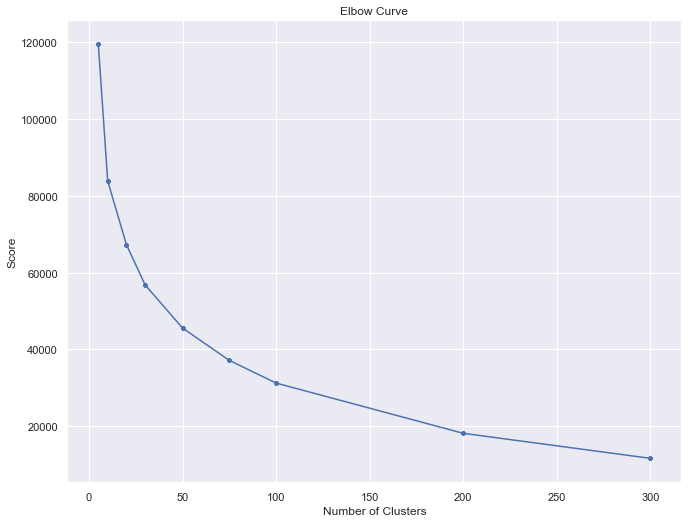

In [70]:
# Graficar los datos etiquetados con k-means

fig, ax = plt.subplots(figsize=(11, 8.5))
plt.title('Elbow Curve')
sns.lineplot(x="Number of Clusters",
             y="Score",
            data=df_Elbow)
sns.scatterplot(x="Number of Clusters",
             y="Score",
             data=df_Elbow)